#MVP Sprint 2 - Parte A: Machine Learning#
Prof. Hugo Villamizar e Patrick Happ

Aluno Carlos Yuri Martins Braga Farias



##Definição do Problema##



###Dataset: Airline Passenger Satisfaction###

Este conjunto de dados contém uma pesquisa de satisfação de passageiros de companhias aéreas. Quais fatores estão altamente correlacionados com um passageiro satisfeito (ou insatisfeito)?


**Informações sobre os atributos:**

1. **Gender:** Sexo dos passageiros.
2. **Customer Type:** o tipo de cliente.
3. **Age:** A idade real dos passageiros.
4. **Type of Travel:** Objetivo do voo dos passageiros.
5. **Class:** Classe de viagem no avião dos passageiros.
6. **Flight distance:** a distância de voo desta viagem.
7. **Inflight wifi service:** Nível de satisfação do serviço wi-fi a bordo.
8. **Departure/Arrival time convenient:** Nível de satisfação da hora de partida/chegada conveniente.
9. **Ease of Online booking:** Nível de satisfação da reserva online.
10. **Gate location:** Nível de satisfação da localização do portão.
11. **Food and drink:** Nível de satisfação de Alimentos e bebidas.
12. **Online boarding:** Nível de satisfação do embarque online.
13. **Seat comfort:** Nível de satisfação do conforto do banco.
14. **Inflight entertainment:** Nível de satisfação do entretenimento a bordo.
15. **On-board service:** Nível de satisfação do serviço de bordo.
16. **Leg room service:** Nível de satisfação do serviço de quarto para pernas.
17. **Baggage handling:** Nível de satisfação do manuseio de bagagem.
18. **Check-in service:** Nível de satisfação do serviço de check-in.
19. **Inflight service:** Nível de satisfação do serviço de bordo.
20. **Cleanliness:** Nível de satisfação de Limpeza.
21. **Departure Delay in Minutes:** Minutos atrasados quando da partida.
22. **Arrival Delay in Minutes:** minutos atrasados na chegada.
23. **Satisfaction:** Nível de satisfação da companhia aérea.



**Objetivo:** Realizar a predição da satisfação de novos passageiros com o serviço oferecido pelas companhias aéreas.

















In [22]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as ms # para tratamento de missings
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_squared_log_error
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada

In [23]:
# Informa a URL de importação do dataset
url = "https://raw.githubusercontent.com/cyurimartins/datasets/main/pesquisa-satisfacao-aerea-train.csv"

# Lê o arquivo
dataset = pd.read_csv(url, delimiter=',')

# Mostra as primeiras linhas do dataset
dataset.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [24]:
# Padronizando o nome das colunas
#tentar melhorar o código
dataset = dataset.rename(columns={'Gender':'gender','Age':'age','Class':'class_voyage','Customer Type':'customer_type', 'Type of Travel' : 'type_travel',	'Flight Distance': 'flight_distance', 'Inflight wifi service' : 'inflight_wifi_service',
                         'Departure/Arrival time convenient':'departurearrival_time_convenient', 'Ease of Online booking':'ease_online_booking', 'Gate location': 'gate_location', 'Food and drink':'food_drink',
                          'Online boarding':'online_boarding', 'Seat comfort':'seat_comfort', 'Inflight entertainment':'inflight_entertainment', 'On-board service':'onboard_service', 'Leg room service':'leg_room_service',
                          'Baggage handling':'baggage_handling', 'Checkin service':'checkin_service', 'Inflight service':'inflight_service', 'Cleanliness':'cleanliness', 'Departure Delay in Minutes': 'departure_delay_minutes',
                          'Arrival Delay in Minutes': 'arrival_delay_minutes'})

Observação:
* Removendo os espaços e padronizando o nome dos atributos do dataset.

In [25]:
dataset = dataset.iloc[:, 2:]

In [26]:
# distribuição das classes
print(dataset.groupby('satisfaction').size())

satisfaction
neutral or dissatisfied    58879
satisfied                  45025
dtype: int64


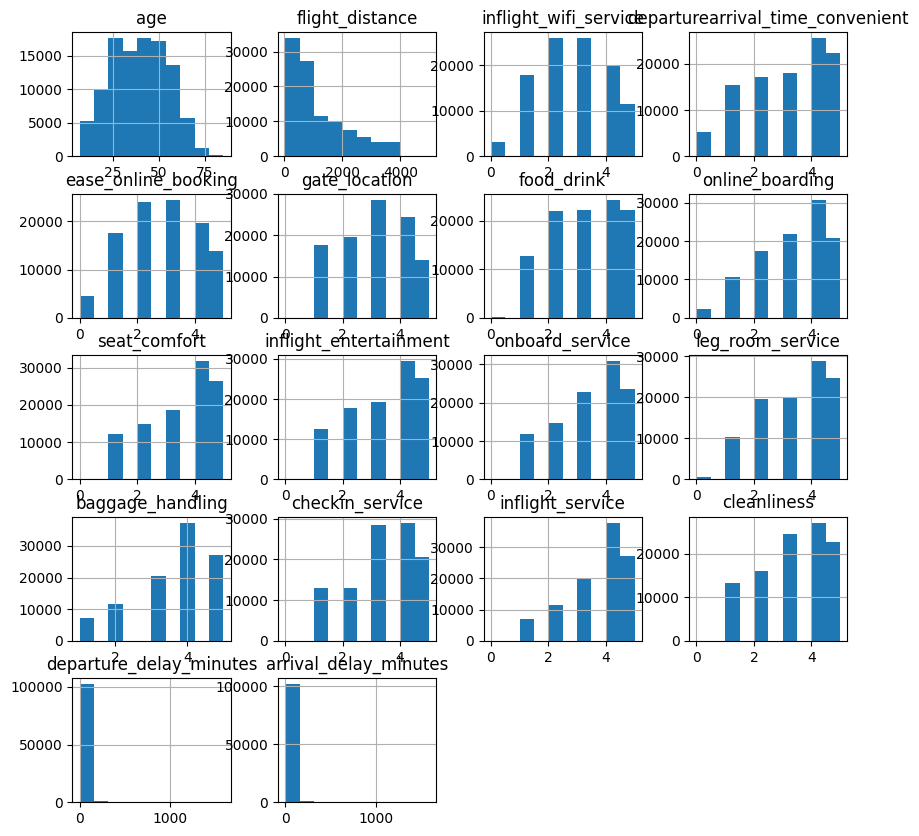

In [27]:
# Histograma
dataset.hist(figsize = (10,10))
plt.show()

Observação:
* Verificando a distribuição dos dados dos atributos.
* observado que o departure_delay_minutes e arrival_delay_minutes possuem valores nulos.

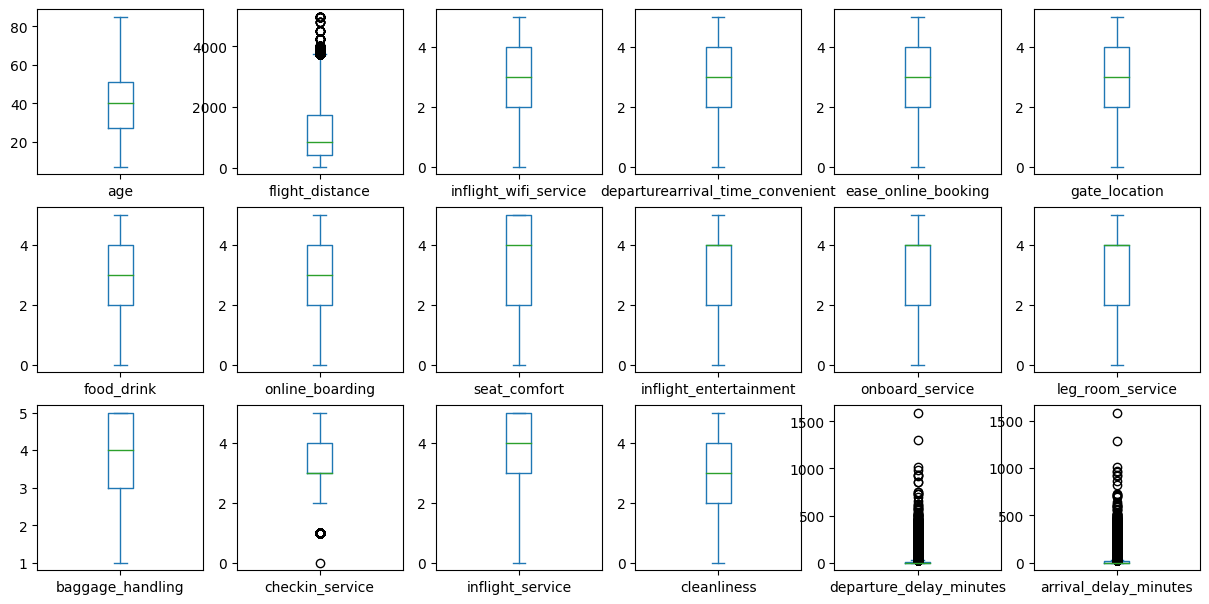

In [28]:
# Boxplot
dataset.plot(kind = 'box', subplots = True, layout = (6,6), sharex = False, sharey = False, figsize = (15,15))
plt.show()

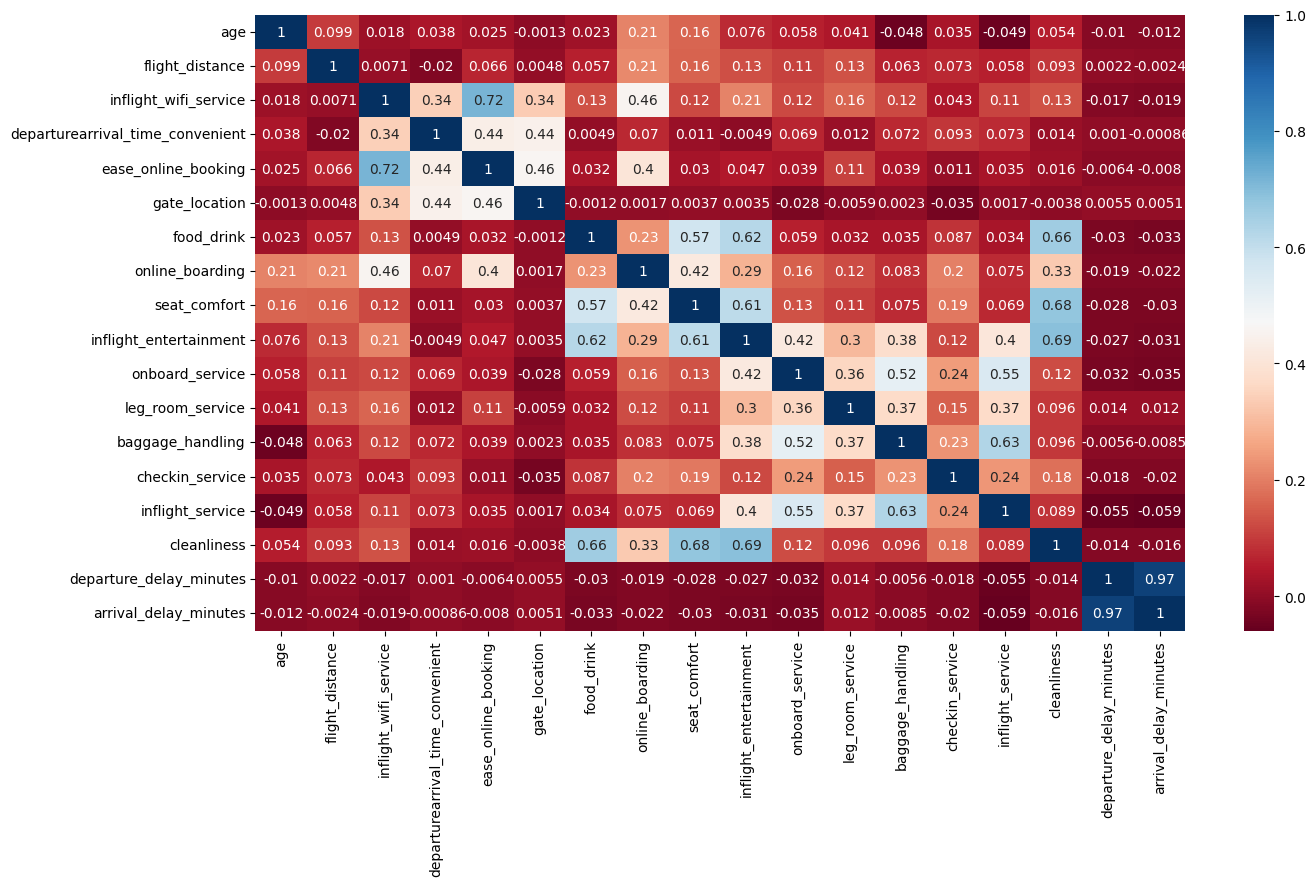

In [29]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

In [30]:
# verificando nulls no dataset
dataset.isnull().sum()

gender                                0
customer_type                         0
age                                   0
type_travel                           0
class_voyage                          0
flight_distance                       0
inflight_wifi_service                 0
departurearrival_time_convenient      0
ease_online_booking                   0
gate_location                         0
food_drink                            0
online_boarding                       0
seat_comfort                          0
inflight_entertainment                0
onboard_service                       0
leg_room_service                      0
baggage_handling                      0
checkin_service                       0
inflight_service                      0
cleanliness                           0
departure_delay_minutes               0
arrival_delay_minutes               310
satisfaction                          0
dtype: int64

<Axes: >

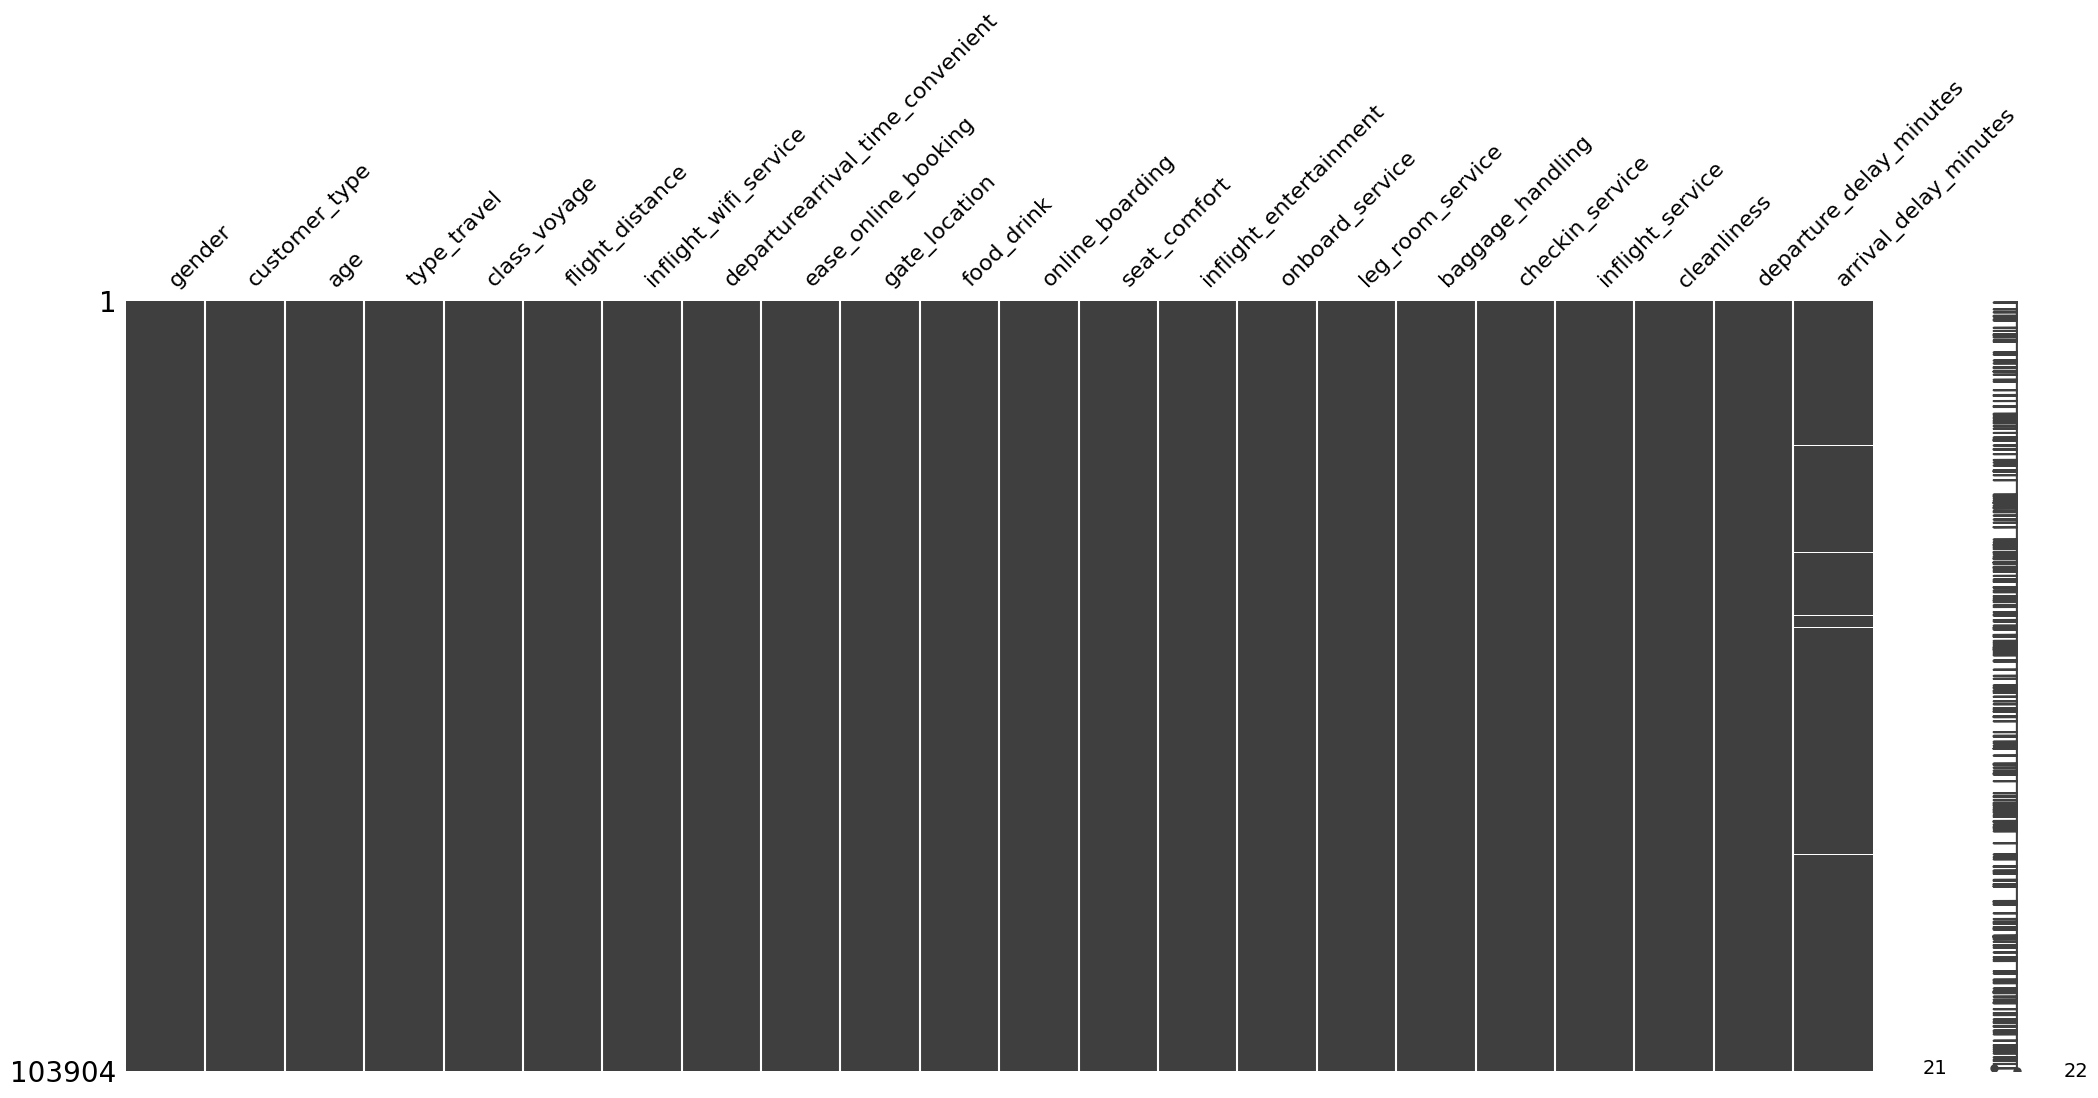

In [31]:
# recuperando os nomes das colunas
col = list(dataset.columns)

# o novo dataset irá conter todas as colunas com exceção da última (classe)
atributos = dataset[col[0:-1]]

# exibindo visualização matricial da nulidade do dataset
ms.matrix(atributos)

###One Hot Encoder###

In [32]:
# importando One Hot Encoder
from sklearn.preprocessing import OneHotEncoder

# criando o objeto one hot encoder
onehotencoder = OneHotEncoder()

In [33]:
# Remodelar a matriz
dataset['gender'] = onehotencoder.fit_transform(dataset.gender.values.reshape(-1,1)).toarray()
dataset['customer_type'] = onehotencoder.fit_transform(dataset.customer_type.values.reshape(-1,1)).toarray()
dataset['type_travel'] = onehotencoder.fit_transform(dataset.type_travel.values.reshape(-1,1)).toarray()
dataset['class_voyage'] = onehotencoder.fit_transform(dataset.class_voyage.values.reshape(-1,1)).toarray()
dataset['satisfaction'] = onehotencoder.fit_transform(dataset.satisfaction.values.reshape(-1,1)).toarray()

dataset = dataset.drop(['departure_delay_minutes','arrival_delay_minutes'], axis=1)

Observação:
* Realizando o processo de normalização dos dados.

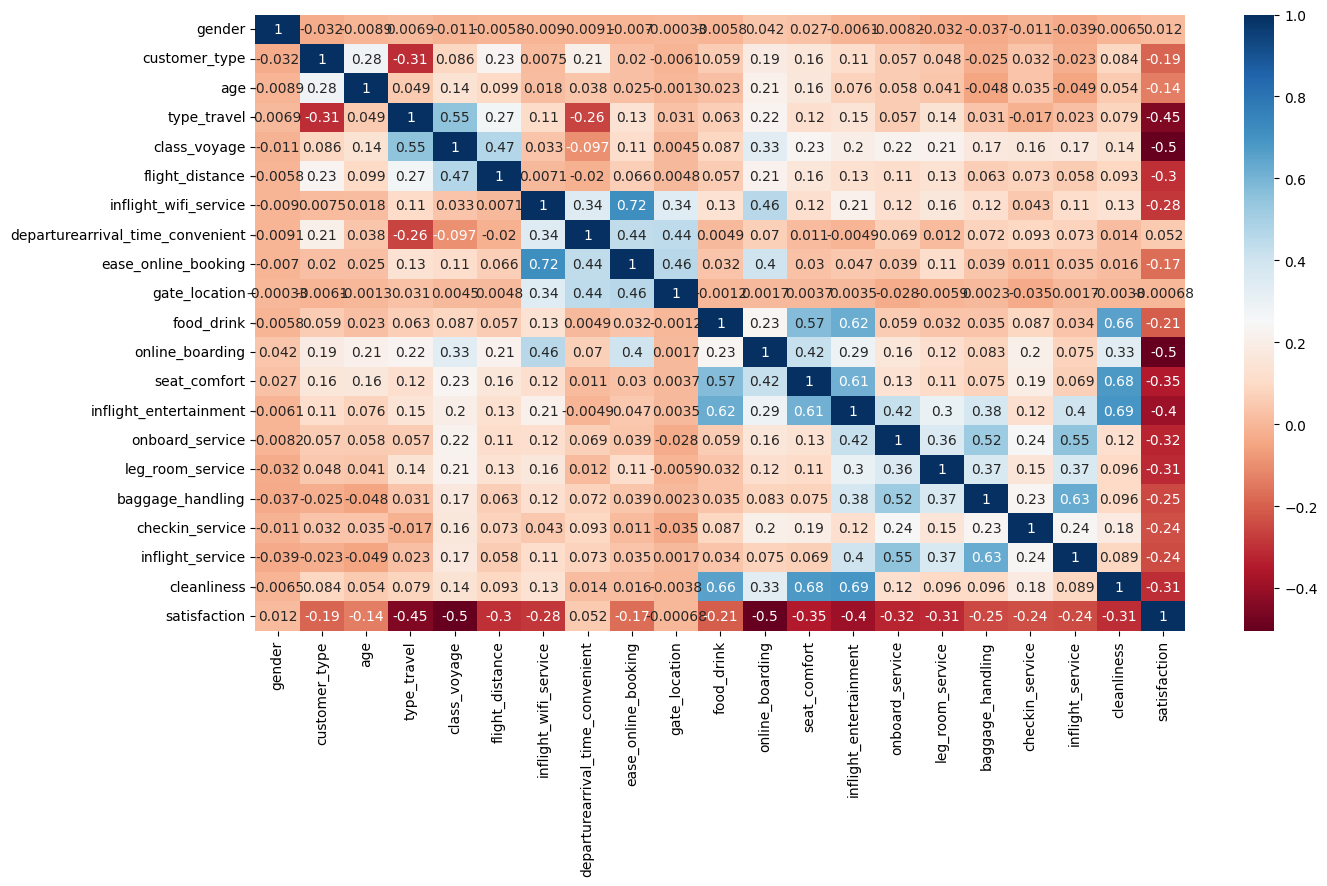

In [34]:
# Matriz de Correlação com Matplotlib Seaborn
plt.figure(figsize = (15,8))
sns.heatmap(dataset.corr(), annot=True, cmap='RdBu');

In [35]:
# distribuição das classes
print(dataset.groupby('satisfaction').size())

satisfaction
0.0    45025
1.0    58879
dtype: int64


Observações:
* 0 = Satisfeito
  * Temos 45.025 passageiros satisfeitos.
* 1 = Neutro ou Insatisfeito
  * Temos 58.879 passageiros Neutro ou insatisfeito.

##Preparação de Dados##

####Separando dados para treino e teste e criando folds para validação cruzada####

###Feature Selection###

**SelectKBest**

In [36]:
# SelectKBest
array_x = dataset.values
array_y = dataset.values
X = array_x[:,0:-1] # atributos
y = array_y[:,20] # target

# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=5)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:20])

# Exibe as pontuações de cada atributos e os 4 escolhidas (com as pontuações mais altas)
np.set_printoptions(precision=3) # 3 casas decimais
print("\nScores dos Atributos Originais:", fit.scores_)
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=dataset.columns[0:20]))


Número original de atributos: 20

Número reduzido de atributos: 5

Atributos Originais: Index(['gender', 'customer_type', 'age', 'type_travel', 'class_voyage',
       'flight_distance', 'inflight_wifi_service',
       'departurearrival_time_convenient', 'ease_online_booking',
       'gate_location', 'food_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness'],
      dtype='object')

Scores dos Atributos Originais: [1.550e+01 3.792e+03 1.992e+03 2.624e+04 3.535e+04 1.018e+04 9.133e+03
 2.774e+02 3.156e+03 4.833e-02 4.790e+03 3.530e+04 1.445e+04 1.956e+04
 1.205e+04 1.130e+04 6.795e+03 6.138e+03 6.620e+03 1.067e+04]

Atributos Selecionados: ['type_travel' 'class_voyage' 'online_boarding' 'seat_comfort'
 'inflight_entertainment']


Observação:
* Realizado o refinamento de atributos para o modelo, passando de 20 atributos para 5.

**Eliminação Recursiva de Atributos**

In [37]:
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos

# Eliminação Recursiva de Atributos

# Criação do modelo
modelo = LogisticRegression(max_iter=200)

# Eliminação Recursiva de Atributos
rfe = RFE(modelo, n_features_to_select=4)
fit = rfe.fit(X, y)

# Print dos resultados
print("Atributos Originais:", dataset.columns[0:20])

# Exibe os atributos selecionados (marcados como True em "Atributos Selecionados"
# e com valor 1 em "Ranking dos Atributos")
print("\nAtributos Selecionados: %s" % fit.support_)
print("\nRanking de atributos: %s" % fit.ranking_)
print("\nQtd de melhores Atributos: %d" % fit.n_features_)
print("\nNomes dos Atributos Selecionados: %s" % fit.get_feature_names_out(input_features=dataset.columns[0:20]))

Atributos Originais: Index(['gender', 'customer_type', 'age', 'type_travel', 'class_voyage',
       'flight_distance', 'inflight_wifi_service',
       'departurearrival_time_convenient', 'ease_online_booking',
       'gate_location', 'food_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness'],
      dtype='object')

Atributos Selecionados: [False  True False  True  True False False False False False False  True
 False False False False False False False False]

Ranking de atributos: [13  1 16  1  1 17  6 10  8 14 15  1 12 11  2  3  9  4  7  5]

Qtd de melhores Atributos: 4

Nomes dos Atributos Selecionados: ['customer_type' 'type_travel' 'class_voyage' 'online_boarding']


**ExtraTrees**

In [38]:
# Importância de Atributos com ExtraTrees

# Criação do modelo para seleção de atributos
modelo = ExtraTreesClassifier(n_estimators=100)
modelo.fit(X,y)

# Exibe os atributos orginais
print("\nAtributos Originais:", dataset.columns[0:20])

# Exibe a pontuação de importância para cada atributo (quanto maior a pontuação, mais importante é o atributo).
print(modelo.feature_importances_)


Atributos Originais: Index(['gender', 'customer_type', 'age', 'type_travel', 'class_voyage',
       'flight_distance', 'inflight_wifi_service',
       'departurearrival_time_convenient', 'ease_online_booking',
       'gate_location', 'food_drink', 'online_boarding', 'seat_comfort',
       'inflight_entertainment', 'onboard_service', 'leg_room_service',
       'baggage_handling', 'checkin_service', 'inflight_service',
       'cleanliness'],
      dtype='object')
[0.007 0.058 0.025 0.117 0.126 0.026 0.135 0.02  0.042 0.018 0.014 0.115
 0.049 0.053 0.034 0.033 0.034 0.031 0.029 0.034]


In [39]:
dataset_novo = dataset[['age','type_travel','flight_distance','food_drink','inflight_entertainment']]
dataset_novo

,age,type_travel,flight_distance,food_drink,inflight_entertainment
0,13,0.0,460,5,5
1,25,1.0,235,1,1
2,26,1.0,1142,5,5
3,25,1.0,562,2,2
4,61,1.0,214,4,3
...,...,...,...,...,...
103899,23,1.0,192,2,2
103900,49,1.0,2347,2,5
103901,30,1.0,1995,4,4
103902,22,1.0,1000,1,1


In [41]:
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
seed = 7
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Observação: Foi realizada a validação cruzada para dividir aleatoriamente o conjunto de dados, ou seja, em cada rodada os subconjuntos são utilizados como teste e os restantes são reunidos em um único conjunto de treino.

In [42]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array_x = dataset_novo.values
array_y = dataset.values
X = array_x[:,0:-1] # atributos
y = array_y[:,20] # target
X_train, X_test, y_train, y_test = train_test_split(X, y,
                test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

In [ ]:
# Definindo uma semente global
np.random.seed(7)

# Lista que armazenará os modelos, resultados e nomes
models = []
results = []
names = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
#model3 = SVC()
#bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.749022 (0.005375)
KNN: 0.669682 (0.006569)
CART: 0.679980 (0.005230)
NB: 0.741912 (0.005309)


In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(10,5))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Observações:
* Os modelos tiveram uma acurácia bem satisfatória.  
* Os modelos ADA e GB tiveram os melhores resultados.
  * GB: 0.772301 (0.005030)
  * Ada: 0.759164 (0.004542)


###Criação e avaliação de modelos: dados padronizados e normalizados###

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
#svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

In [ ]:
# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Observações:
* O modelo GB obteve um resultado satisfatório e será o modelo escolhido para prosseguir com a predição do problema proposto.
  * GB-orig: 0.772 (0.005)
  * GB-padr: 0.772 (0.005)
  * GB-norm: 0.772 (0.005)



##Modelagem e treinamento##

###Otimização dos hiperparâmetros###

In [ ]:
# Tuning do Random Forest

# Definindo uma semente global para este bloco
np.random.seed(7)

# Criando lista de pipelines
pipelines = []

# Definindo os componentes do pipeline
gb = ('GB', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('GB-orig', Pipeline(steps=[gb])))
pipelines.append(('GB-padr', Pipeline(steps=[standard_scaler, gb])))
pipelines.append(('GB-norm', Pipeline(steps=[min_max_scaler, gb])))

param_grid = {
	"n_estimators":[5,50],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10]
}


# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(GradientBoostingClassifier(), param_grid)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Observação:
* Não foi encontrado nenhuma melhora na realização do tuning do modelo GB

##Avaliação de Resultados##

###Finalização do Modelo###

In [ ]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model = GradientBoostingClassifier()
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

Observação: Após o processamento dos teste obtemos uma acurácia de 77,1%, resutado semelhante ao conjunto de treinamento que foi de 77,2%.

In [ ]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

###Simulando a aplicação do modelo em dados não vistos###

Realizando a entrada de novos dados para simular a realização da predição do modelo em produção.

In [ ]:
dataset['inflight_entertainment'].head(10)

In [ ]:
# Novos dados - não sabemos a classe!
data = {'age':  [50, 25, 80],
        'type_travel': [1, 1, 0],
        'flight_distance': [300, 580, 3000],
        'food_drink': [5, 2, 4],
        'inflight_entertainment': [5, 5, 1]
        }

atributos = ['age', 'type_travel', 'flight_distance', 'food_drink', 'inflight_entertainment']
entrada = pd.DataFrame(data, columns=atributos)

array_entrada = entrada.values
X_entrada = array_entrada[:,0:4].astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

In [ ]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

Observação: Após predição dos dados de entrada o modelo retornou que as entradas:
* Entrada A: Satisfied (0)
* Entrada C: Neutral or dissatisfied (1)
* Entrada B: Neutral or dissatisfied (1)




###Conclusão###

* O modelo Gradient Boosting obteve um bom resultado de predição dos resultados com uma acurácia de 77% nos testes, então o modelo consegue prever a satisfação dos passageiros de acordo com a idade, tipo da viagem, distancia da viagem, satisfação do serviço de alimentos e bebidas e satisfação com e entretenimento na viagem.


#Parte B: Deep Learning#

##Definição do Problema##

Dataset: MNIST digits classification dataset

Prever qual numero corresponde no dataset.


##Importando as bibliotecas necessárias##

In [ ]:
# Importação das bibliotecas
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

In [ ]:
# Obtenção dos dados e divisão automática entre treinamento e teste
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

# Visualização de imagens específicas
plt.imshow(X_treinamento[8], cmap = 'gray')
plt.title(y_treinamento[8])

Observações:
* Escolhendo a imagem 7 no dataset que corredponde a imagem com index [8] e visualizando.

## Preparação dos dados ##

In [ ]:
# Mudança de dimensão, originalmente está em 28x28 e precisamos 784
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))
X_teste[0]

Observações:
* Alterando as dimensões das imagens para 784

In [ ]:
# Transformação dos dados para float para podermos normalizar os dados
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

In [ ]:
# Normalização (255 é o valor máximo de um pixel)
X_treinamento /= 255
X_teste /= 255

In [ ]:
# Transformação para o formato dummy (temos 10 classes)
y_treinamento = np_utils.to_categorical(y_treinamento, 100)
y_teste = np_utils.to_categorical(y_teste, 100)
y_teste[0]

In [ ]:
# Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
# Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#camada de saida, softmax probabilidade
modelo.add(Dense(units = 100, activation = 'softmax'))

Observações:
* Utilizando dropout para zerar e evitar overfiting

In [ ]:
# Visualização da estrutura da rede neural
modelo.summary()

In [ ]:
# Configuração dos parâmetros da rede neural e treinamento
# Na variável historico temos os histórico das execuções
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(X_treinamento, y_treinamento, epochs = 10, validation_data = (X_teste, y_teste))

In [ ]:
# Gráfico para visualizar os erros e accuracy
historico.history.keys()

#evolução do erro, azul
plt.plot(historico.history['val_loss'])

#performance da rede
plt.plot(historico.history['val_accuracy'])

Observações:
* Visualizando os erros e acertos do modelo treinado.

In [ ]:
# Obtenção das previsões
previsoes = modelo.predict(X_teste)
previsoes

In [ ]:
# valor máximo (com a probabilidade maior por serem 10 saídas) e geração da matriz de confusão
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

Observações:
* Observando a matriz de confusão gerada.

In [ ]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
y_treinamento[5]

##Finalização do modelo##

In [ ]:
#passo a mesma posição para o modelo prever
novo = X_treinamento[5]

#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)

#previsao
pred = modelo.predict(novo)

#maior valor
pred = [np.argmax(pred) for t in pred]
pred

Observações:
* Escolhendo a imagem com ordem 5 no dataset para o modelo realizar a predição